# London Bike Sharing Analysis
        https://www.kaggle.com/datasets/hmavrodiev/london-bike-sharing-dataset?resource=download

In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Features

    "timestamp" - timestamp field for grouping the data
    "cnt" - the count of a new bike shares
    "t1" - real temperature in C
    "t2" - temperature in C "feels like"
    "hum" - humidity in percentage
    "wind_speed" - wind speed in km/h
    "weather_code" - category of the weather
    "is_holiday" - boolean field - 1 holiday / 0 non holiday
    "is_weekend" - boolean field - 1 if the day is weekend
    "season" - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

    "weathe_code" category description:
        1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity 
        2 = scattered clouds / few clouds 
        3 = Broken clouds 
        4 = Cloudy 
        7 = Rain/ light Rain shower/ Light rain 
        10 = rain with thunderstorm 
        26 = snowfall 
        94 = Freezing Fog

In [274]:
# Reading The dataset
df = pd.read_csv('london_bike_sharing_dataSet.csv',parse_dates=['timestamp'])

In [275]:
df.shape

(17414, 10)

In [276]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [277]:
#  Let's rename the columns name

df.rename(columns={'cnt':'count','t1':'real_temp','t2':'feel_temp'},inplace=True)

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   timestamp     17414 non-null  datetime64[ns]
 1   count         17414 non-null  int64         
 2   real_temp     17414 non-null  float64       
 3   feel_temp     17414 non-null  float64       
 4   hum           17414 non-null  float64       
 5   wind_speed    17414 non-null  float64       
 6   weather_code  17414 non-null  float64       
 7   is_holiday    17414 non-null  float64       
 8   is_weekend    17414 non-null  float64       
 9   season        17414 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 1.3 MB


In [279]:
# missing Values
df.isnull().sum()

timestamp       0
count           0
real_temp       0
feel_temp       0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [282]:
# Feature Engineering 

# Separating Day, time, week 

df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['date'] = df['timestamp'].dt.date
df['day'] = df['timestamp'].dt.day_name()
df['hour'] = df['timestamp'].dt.hour
df['week'] = df['timestamp'].dt.isocalendar().week

In [284]:
df.drop(['timestamp'],axis=1,inplace=True)

In [285]:
df['weather_code'].value_counts()

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

In [286]:
# Adding weather code

weather_dict = {1:'clear',
               2:'scattered_clouds',
               3:'broken_clouds',
               4:'cloudy',
               7:'rain',
               10:'rain_with_thunderstorm',
               26:'snowfall'}

df['weather'] = df['weather_code'].map(weather_dict)

season_dict = {0:'spring',1:'summer',2:'fall',3:'winter'}


df['seasonCat'] = df['season'].map(season_dict)

# EDA

In [287]:
df.head(3)

,count,real_temp,feel_temp,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,date,day,hour,week,month,weather,seasonCat
0,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,2015-01-04,Sunday,0,1,1,broken_clouds,winter
1,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,2015-01-04,Sunday,1,1,1,clear,winter
2,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,2015-01-04,Sunday,2,1,1,clear,winter


In [288]:
df['date'].agg([min,max])

min    2015-01-04
max    2017-01-03
Name: date, dtype: object

# Average Bike Sharing per season

In [289]:
df.groupby(['seasonCat'])['count'].mean()

seasonCat
fall      1178.954218
spring    1103.831589
summer    1464.465238
winter     821.729099
Name: count, dtype: float64

   - Note : Avg Bike sharing in Summer is High 

## Average Bike Sharing per Day

In [290]:
df.groupby(['day'])['count'].mean()

day
Friday       1182.772653
Monday       1130.270734
Saturday      995.553753
Sunday        959.567265
Thursday     1258.810594
Tuesday      1230.105389
Wednesday    1244.409000
Name: count, dtype: float64

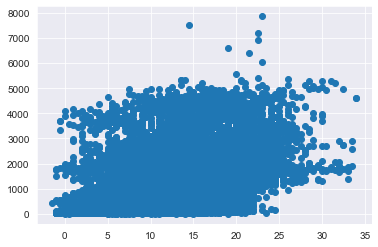

In [292]:
plt.scatter(df['real_temp'],df['count'])

In [299]:
df[df['count']==df['count'].max()]

,count,real_temp,feel_temp,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,date,day,hour,week,month,weather,seasonCat
4470,7860,23.0,22.0,27.0,11.0,1.0,0.0,0.0,1.0,2015,2015-07-09,Thursday,17,28,7,clear,summer


In [301]:
df.groupby(['seasonCat'])['real_temp'].agg([min,max])

,min,max
seasonCat,,
fall,-1.0,33.0
spring,0.5,26.0
summer,9.0,34.0
winter,-1.5,16.5


      - Number of bike shares when the weather is hot

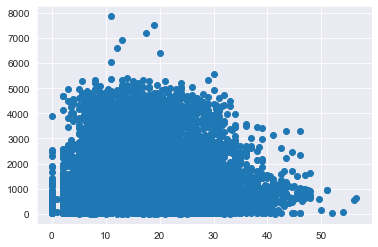

In [306]:
plt.scatter(df['wind_speed'],df['count']);

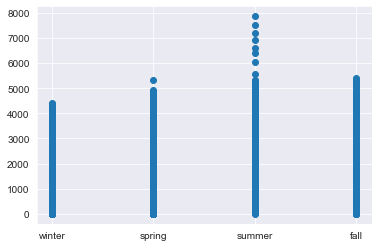

In [307]:
plt.scatter(df['seasonCat'],df['count']);

In [144]:
# Lowest Bike shares in winter

df[df.seasonCat=='winter']['count'].agg([max,min])

max    4415
min      10
Name: count, dtype: int64

In [146]:
df.groupby(['seasonCat'])['count'].agg([min,max])

,min,max
seasonCat,,
fall,9,5422
spring,0,5322
summer,12,7860
winter,10,4415


# How is the rental Demand over Year?

In [153]:
ride_count_year=df.groupby(['year'])['count'].sum().reset_index(name='rideCount')
ride_count_year

,year,rideCount
0,2015,9738746
1,2016,10129546
2,2017,37680


## How is the demand over week?

In [159]:
weekly_ride_count = df.groupby(['week']).sum()['count'].reset_index(name='rideCount')
weekly_ride_count.head()

,week,rideCount
0,1,171617
1,2,270000
2,3,285224
3,4,289772
4,5,280705


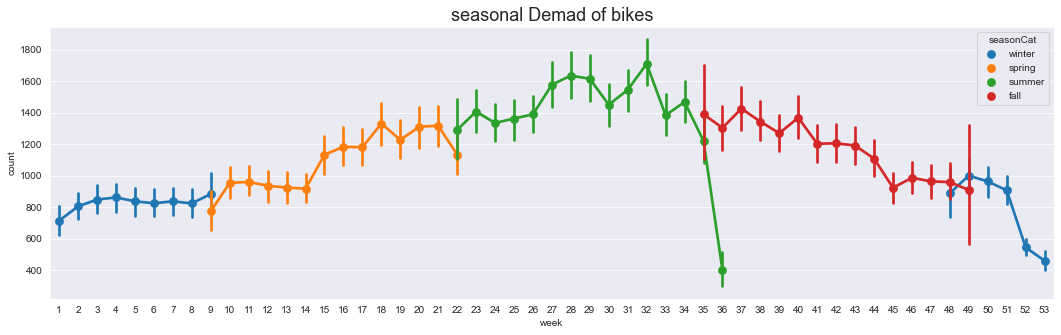

In [168]:
plt.figure(figsize=(18,5))
sns.set_style('darkgrid')
sns.pointplot(data=df,x='week',y='count',
              hue='seasonCat')
plt.title('seasonal Demad of bikes',size=18);

    - Note : Ride counts are high in Summar

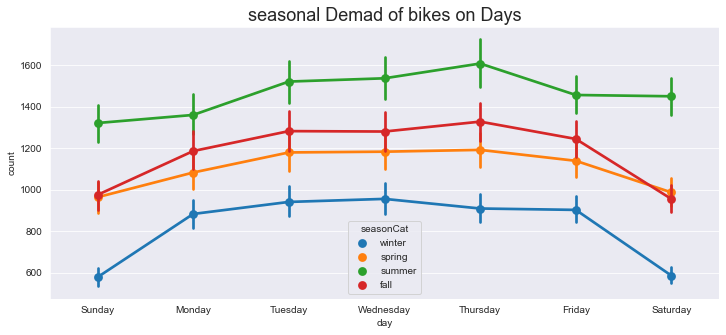

In [171]:
plt.figure(figsize=(12,5))
sns.set_style('darkgrid')
sns.pointplot(data=df,x='day',y='count',
              hue='seasonCat')
plt.title('seasonal Demad of bikes on Days',size=18);

     - Ride counts are normally high in weekdays rather than weekends

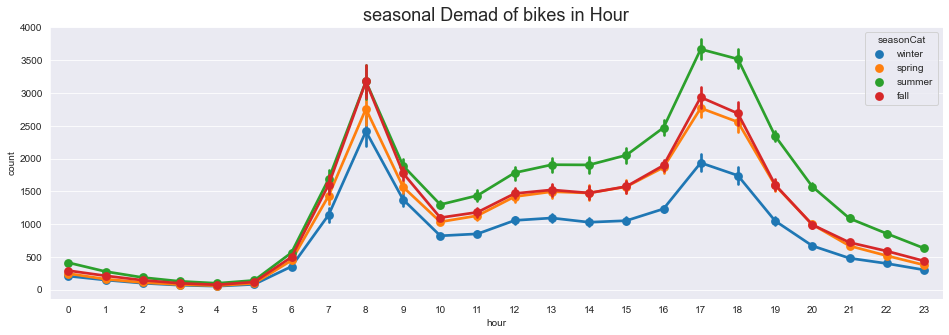

In [173]:
plt.figure(figsize=(16,5))
sns.set_style('darkgrid')
sns.pointplot(data=df,x='hour',y='count',
              hue='seasonCat')
plt.title('seasonal Demad of bikes in Hour',size=18);

    - Ride counts are normally high in Non office hour , basically ofiice going hours

# Monthly Distribution of Bike counts

In [244]:
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.month

In [247]:

t1 = df.groupby(['month']).sum()['count'].reset_index(name='ride_count')


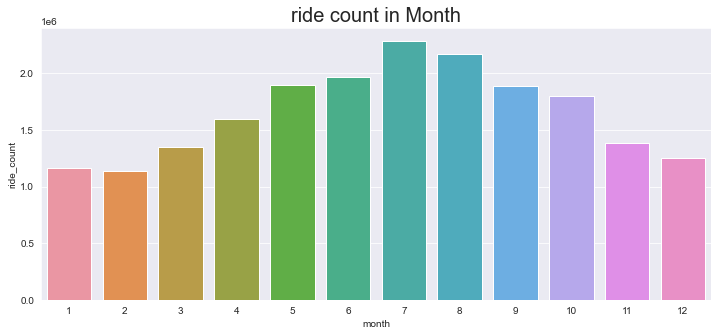

In [248]:


plt.figure(figsize=(12,5))
sns.barplot(data=t1,x='month',y='ride_count')
plt.title('ride count in Month',size=20);

## Does the temp has any noticable impact on ride count

In [175]:
df[['count','real_temp','feel_temp']].corr()

,count,real_temp,feel_temp
count,1.000000,0.388798,0.369035
real_temp,0.388798,1.000000,0.988344
feel_temp,0.369035,0.988344,1.000000


## Is there any corelation between ride count with wind Speed, humidity and season

In [177]:
df[['count','wind_speed','hum','season']].corr()

,count,wind_speed,hum,season
count,1.000000,0.116295,-0.462901,-0.116180
wind_speed,0.116295,1.000000,-0.287789,0.010305
hum,-0.462901,-0.287789,1.000000,0.290381
season,-0.116180,0.010305,0.290381,1.000000


## Average Humidity in all season 

In [180]:
df.groupby(['seasonCat'])['hum'].mean()

seasonCat
fall      76.095863
spring    68.598259
summer    66.845111
winter    77.911316
Name: hum, dtype: float64

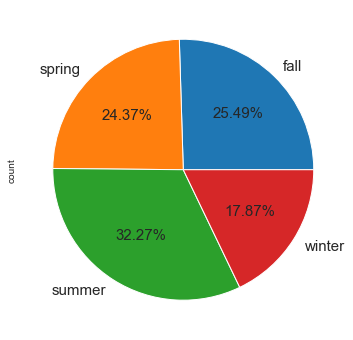

In [187]:
plt.figure(figsize=(10,6))
df.groupby(['seasonCat'])['count'].sum().plot.pie(autopct='%.2f%%',fontsize=15);

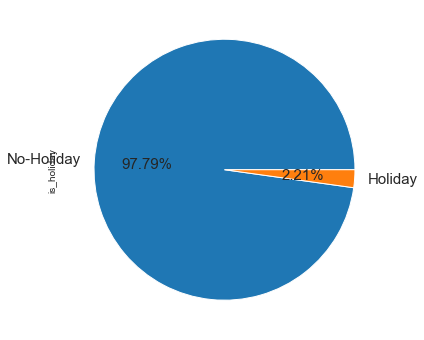

In [192]:
plt.figure(figsize=(10,6))
df['is_holiday'].value_counts().plot.pie(autopct='%.2f%%',fontsize=15,labels=['No-Holiday','Holiday']);

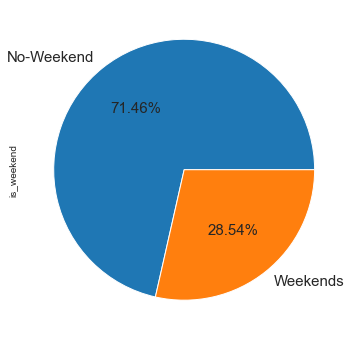

In [197]:
plt.figure(figsize=(10,6))
df['is_weekend'].value_counts().plot.pie(autopct='%.2f%%',fontsize=15,labels=['No-Weekend','Weekends']);

In [199]:
rental_by_weather = df.groupby(['weather'])['count'].sum().reset_index(name='ride_count')

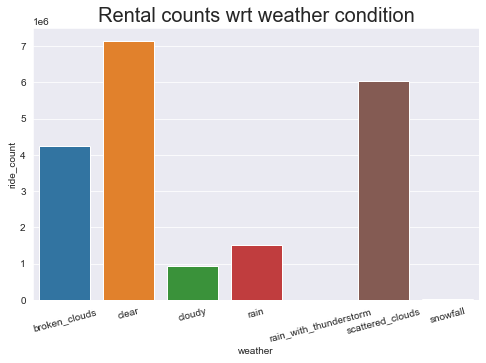

In [207]:
plt.figure(figsize=(8,5))
sns.barplot(x='weather',y='ride_count',data=rental_by_weather)
plt.xticks(rotation=15)
plt.title('Rental counts wrt weather condition',size=20);

In [200]:
rental_by_weather

,weather,ride_count
0,broken_clouds,4243887
1,clear,7146847
2,cloudy,929978
3,rain,1526461
4,rain_with_thunderstorm,8168
5,scattered_clouds,6035580
6,snowfall,15051
